## Road Map:

* [Step 0](#step0): Import Datasets.

* [Step 1](#step1): Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

* [Step 2](#step2): A quick visualization with *Seaborn*.

* [Step 3](#step3): At First, I applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

* [Step 4](#step4): Next, I experimented with different topologies, optimizers, and hyperparameters for different models.

* [Step 5](#step5): Model tuning.

* [Step 6](#step6): Feature Selection.

* [Step 7](#step7): Then I built a Multi-Layer Perceptron and train it to classify indivisual with ASD based on its features.

* [Step 8](#step8): Conclusion.

## Let's begin with preparing our data set.

---
<a id='step0'></a>
## Step 0: Import Datasets

 I start by importing the 'asv.csv' file into a Pandas dataframe and take a look at it.

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('ASD.csv')
display(data.head(n=5))

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))


Total number of records: 292
Individuals diagonised with ASD: 141
Individuals not diagonised with ASD: 151
Percentage of individuals diagonised with ASD: 48.29%


** Featureset Exploration **

This data contains 704 instances, and contains the following attributes:
* **age**: *number* (Age in years). 
* **gendar**: *String* [Male/Female]. 
* **ethnicity**: *String* (List of common ethnicities in text format). 
* **Born with jaundice**: *Boolean* [yes or no]. 
* **Family member with PDD**: *Boolean* [yes or no]. 
* **Who is completing the test**: *String* [Parent, self, caregiver, medical staff, clinician ,etc.].
* **Country of residence **: *String* (List of countries in text format).
* **Used the screening app before **: *Boolean* [yes or no] (Whether the user has used a screening app) 
* **Screening Method Type**: *Integer* [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).
* **Question 1-10 Answer**: *Binary* [0, 1] (The answer code of the question based on the screening method used).
* **Screening Score**: *Integer* (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as **preprocessing**. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [ ]:
asd_data = pd.read_csv('ASD.csv', na_values=['?'])
asd_data.head(n=5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


Here I evaluate whether the data needs cleaning; your model is only as good as the data it's given.

In [ ]:
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


There are quite a few missing values in the data set. Before I just drop every row that's missing data, I make sure not to bias the data in any way. In other words we need to make sure that there does not appear to be any sort of correlation to what sort of data has missing fields. If there were, I'd have to try and go back and fill that data in.

---
<a id='step1'></a>
## Step 1: Clean Datasets

In [ ]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
5,6,0,0,1,0,1,1,0,1,0,...,m,NaN,no,yes,Egypt,no,5,4-11 years,NaN,NO
9,10,0,0,1,1,1,0,1,1,0,...,f,NaN,no,yes,Austria,no,5,4-11 years,NaN,NO
11,12,0,1,0,0,1,0,0,0,0,...,f,NaN,no,no,Kuwait,no,3,4-11 years,NaN,NO
19,20,1,1,1,1,1,1,0,1,0,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
21,22,0,0,1,1,0,1,0,1,1,...,f,NaN,no,no,Egypt,no,5,4-11 years,NaN,NO
24,25,1,0,1,1,1,1,0,1,1,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
28,29,0,1,1,0,0,0,1,1,0,...,m,NaN,no,yes,United Arab Emirates,no,5,4-11 years,NaN,NO
32,33,1,0,0,1,0,1,1,1,1,...,m,NaN,no,no,Egypt,no,7,4-11 years,NaN,YES


Since the missing data seems randomly distributed, I go ahead and drop rows with missing data. 

In [ ]:
asd_data.dropna(inplace=True)
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,150.766129,0.685484,0.516129,0.745968,0.572581,0.754032,0.713710,0.625000,0.479839,0.540323,0.733871,6.427419,6.366935
std,82.938601,0.465262,0.500750,0.436196,0.495704,0.431530,0.452941,0.485102,0.500604,0.499379,0.442826,2.386444,2.342711
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,82.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,7.000000
75%,220.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


### If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

In [ ]:
#asd_data.median()
#numerical = ['age', 'result']
#asd_data.fillna(asd_data[numerical].median())
#asd_data.describe()

Let's check out the data types of all our features including the target feature. Moreover, lets count the total number of instances and the target-class distribution.

In [ ]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))

id                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object
Total number of records: 248
Individuals diagonised with ASD: 126
Individuals not diagonised with ASD: 122


---
<a id='step2'></a>

## Step 2: A quick visualization with *Seaborn*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

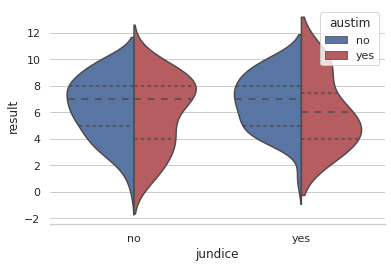

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

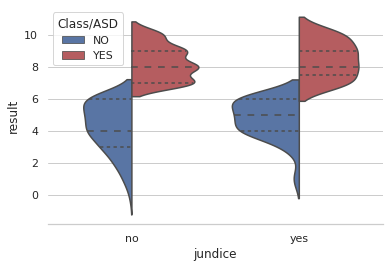

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

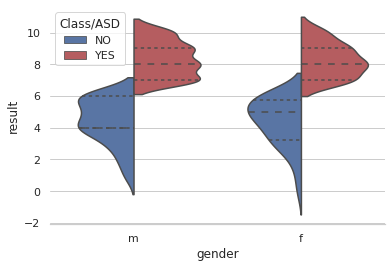

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


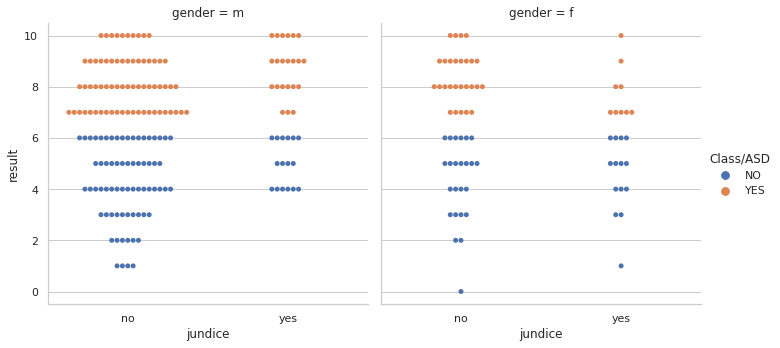

In [ ]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


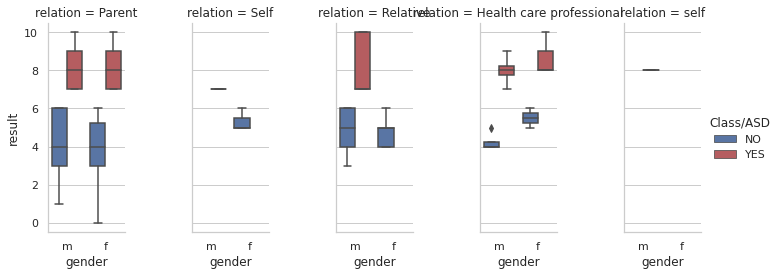

In [ ]:
sns.factorplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


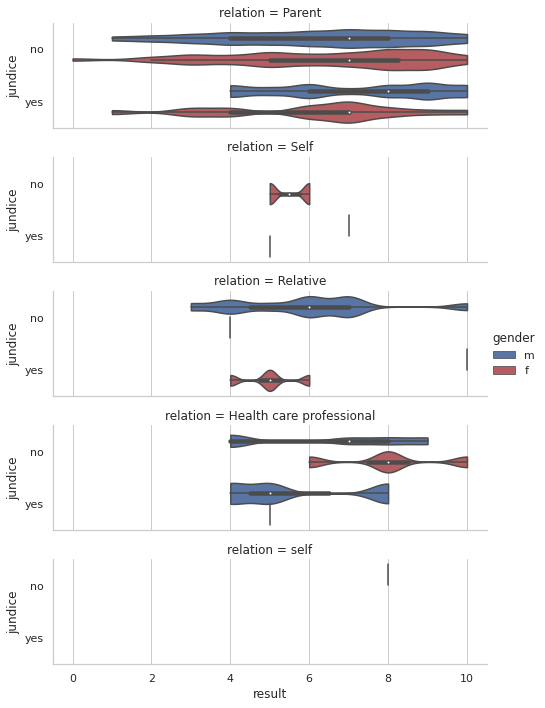

In [ ]:
g = sns.factorplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", size=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used `factorplot` module from `seaborn` visualization software. In the first case, I used '`swamp`' kind of graph expressing the relationship between several different features present in the data whereas in the second case, '`box`' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD). 

In [ ]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Some of our models require the input data to be normalized, so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,Middle Eastern,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
4,0.142857,m,Others,yes,no,United States,1.0,Parent,1,1,1,1,1,1,1,1,1,1
6,0.142857,m,White-European,no,no,United Kingdom,0.7,Parent,1,0,1,1,1,1,0,1,0,1
7,0.142857,f,Middle Eastern,no,no,Bahrain,0.8,Parent,1,1,1,1,1,1,1,1,0,0


### One-Hot-Coding

From the table in **Clean Data Sets** above, we can see there are several features for each record that are non-numeric such as `Country_of_residence`, `ethnicity` etc. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, I need to convert the non-numeric target label, `'Class/ASD'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("YES" and "NO" to Class/ASD), I can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, I will implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_minmax_transform'` data.
 - Convert the target label `'asd_raw'` to numerical entries.
   - Set records with "NO" to `0` and records with "YES" to `1`.

In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Turkey,contry_of_res_U.S. Outlying Islands,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
0,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.142857,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
6,0.142857,0.7,1,0,1,1,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
7,0.142857,0.8,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


79 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahrain', 'contry_of_res_Bangladesh', 'contry_of_res_Bhutan', 'contry_of_res_Brazil', 'contry_of_res_Bulgaria', 'contry_of_res_Canada', 'contry_of_res_Costa Rica', 'contry_of_res_Egypt', 'contry_of_res_Europe', 'contry_of_res_Georgia', 'contry_of_res_Germany', 'contry_of_res_Ghana', 'contry_of_res_India', 'contry_of_res_Iraq', 'contry_of_res_Ireland', 'contry_of_r

Text(0, 0.5, 'Frequency')

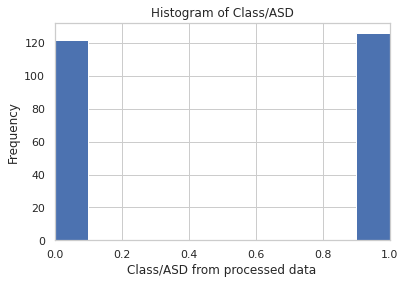

In [ ]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 198 samples.
Testing set has 50 samples.


---
<a id='step3'></a>

## Step 3: Models

###  Supervised Learning Models
**I have applied the following supervised learning models in this project which are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html).

[(1)](#1): Decision Trees

[(2)](#2) Random Forest

[(3)](#3) Support Vector Machines (SVM)

[(4)](#4) K-Nearest Neighbors (KNeighbors)

[(5)](#5) Gaussian Naive Bayes (GaussianNB)

[(6)](#6) Logistic Regression

[(7)](#7) Linear Discriminant Analysis (LDA)

[(8)](#8) Quadratic Discriminant Analysis (QDA)

In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used `factorplot` module from `seaborn` visualization software. In the first case, I used '`swamp`' kind of graph expressing the relationship between several different features present in the data whereas in the second case, '`box`' method was used to present the visual way of showing how different features were associated with each other.

---
<a id='1'></a>

##  (1) Decision Trees

I start with creating a DecisionTreeClassifier and fit it to the training data.

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Depiction of Decision Tree algorithm

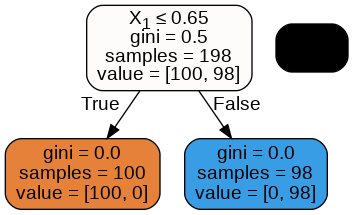

In [ ]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

---------------
## Evaluating Model Performance

### Metrics 
We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case where we have 
- a total of 609 records with 
- 180 individuals diagonised with ASD and 
- 429 individuals not diagonised with ASD

accuracy by itself is not a very good metric. 
Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [ ]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [ ]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1]
False: [1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1]


In [ ]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[22  0]
 [ 0 28]]


### Metrics computed from a confusion matrix

**Classification Accuracy**: Overall, how often is the classifier correct?

In [ ]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


**Classification Error**: Overall, how often is the classifier incorrect?

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


**Sensitivity**: When the actual value is positive, how often is the prediction correct?


In [ ]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


**Specificity**: When the actual value is negative, how often is the prediction correct?

In [ ]:
specificity = TN / (TN + FP)

print(specificity)

1.0


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [ ]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


**Precision**: When a positive value is predicted, how often is the prediction correct?

In [ ]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))

1.0


### Visualizing the classification prediction:

In [ ]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
# print the first 10 predicted probabilities of class membership
dectree.predict_proba(X_test)[0:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

In [ ]:
# allow plots to appear in the notebook

import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

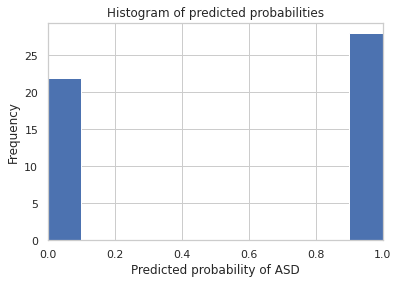

In [ ]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

### Receiver Operating Characteristic (ROC) Curves

It would be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold? Lets plot the ROC curve.

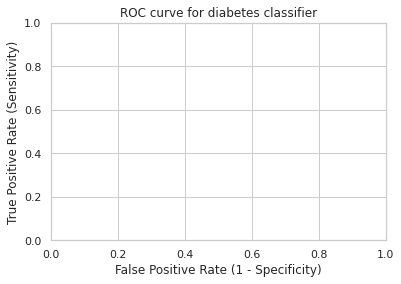

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### Score metric for Model performance

In [ ]:
dectree.score(X_test, y_test)

1.0

### Cross-validation:

Now instead of a single train/test split, I use K-Fold cross validation to get a better measure of your model's accuracy (K=10). 

In [ ]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

### AUC Score: 

AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

### F-beta Score:

In [ ]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

---
<a id='2'></a>
## (2) Random Forest

Now I apply a **RandomForestClassifier** instead to see whether it performs better.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9960000000000001

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [ ]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9642857142857143

---
<a id='3'></a>
## (3) SVM

Next I try using svm.SVC with a linear kernel and see how well it does in comparison to the decision tree.

In [ ]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [ ]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9879999999999999

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9993589743589745

F-beta Score:

In [ ]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9722222222222222

---
<a id='4'></a>

## (4) K-Nearest-Neighbors (KNN)
Next, I explore the K-Nearest-Neighbors algorithm with a starting value of K=10. Recall that K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.875

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9618856837606838

F-beta Score:

In [ ]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9459459459459459

Choosing K is tricky, so I can't discard KNN until we've tried different values of K. Hence we write a for loop to run KNN with K values ranging from 10 to 50 and see if K makes a substantial difference. 

In [ ]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

10 0.875
11 0.867
12 0.8831666666666667
13 0.8668333333333333
14 0.891
15 0.8826666666666666
16 0.9068333333333334
17 0.8664999999999999
18 0.8746666666666666
19 0.8706666666666667
20 0.8828333333333334
21 0.8625
22 0.8788333333333334
23 0.8746666666666666
24 0.9031666666666667
25 0.8828333333333334
26 0.8911666666666667
27 0.8748333333333334
28 0.899
29 0.875
30 0.891
31 0.8708333333333333
32 0.875
33 0.859
34 0.867
35 0.8631666666666667
36 0.8793333333333333
37 0.8713333333333335
38 0.8713333333333335
39 0.8633333333333333
40 0.8753333333333334
41 0.859
42 0.8671666666666666
43 0.8551666666666666
44 0.8711666666666666
45 0.8591666666666666
46 0.8671666666666666
47 0.8671666666666666
48 0.8751666666666666
49 0.8591666666666666


---
<a id='5'></a>

## (5) Naive Bayes

Now I try naive_bayes.MultinomialNB classifier and ask how does its accuracy stack up.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.7986666666666667

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.8808226495726496

F-beta Score:

In [ ]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8552631578947367

---
<a id='6'></a>

## (6) Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9878333333333333

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9993589743589745

F-beta Score:

In [ ]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

---
<a id='7'></a>

## (7) Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9356666666666665

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(lda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9762820512820513

F-beta Score:

In [ ]:
lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9722222222222222

---
<a id='8'></a>
## (8) Quadratic Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, features_final, asd_classes, cv=10)
cv_scores.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminan

0.5733333333333335

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(qda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminan

0.7240384615384614

F-beta Score:

In [ ]:
qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.625

---
<a id='step5'></a>

## Step 5: Model Tuning

Now I will fine tune the chosen model. For this I use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. I will need to use the entire training set for this. In the code cell below, I will need to implement the following:

- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.



Note that, svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Here I experiented with different kernels such as 'rbf', 'sigmoid', and 'poly' and found that the best-performing kernel is `linear`.

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# TODO: Initialize the classifier
clf = SVC(random_state = 1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9600
F-score on testing data: 0.9643

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


In this `GridSearchCV` methos, we came up with the best result when the kernel was selected as `linear`.

---
<a id='step6'></a>
## Step 6: Feature Importance

An important task when performing supervised learning on a dataset like the autistic data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual has ASD or not.

Choose a scikit-learn classifier (e.g., gradientBoosting, adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the ASD dataset.

###  Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, I will implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Train the supervised model on the 1 set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)
# Plot


[ 1.34102027e-16  1.00000000e+00  0.00000000e+00  0.00000000e+00
  2.38890425e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.18756865e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.38139644e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.40621962e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.94075156e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


### Feature Selection
We need to ask ourselves how does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features(in order with their weightage factor) contribute more than half of the importance of **all** features present in the data. These 5 features are:
- '`result`'
- '`relation_self`'
- '`country_of_residence`'
- '`jundice_no`'
- '`jundice_yes`'

This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. Although looking at those weight factor it seems like '`result`' feature is clearly dominating its influence on the algorithms over all other features.

---
<a id='step8'></a>

## Step 8: Conclusion


After exploring my `ASD` dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used three different `metric` (such as `accuracy`, `AUC score` and `F-score`) to measure the performance of my models, and it seems like all of the `metric` indicated an almost perfect classification of the ASD cases. Here I think the reason of this high performances with different models is the fact that only one of the feature is predominant over all others which I confirmed with the [`Feature Importance`](#step6) section in this notebook. 

I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that I can claim that this model is optimum. As this dataset is only publicly available from Decemeber 2017, I think not many works that deal with this dataset is available online. In that consideration, my models can serve as benchmark models for any machine learning researcher/practitioner who will be interested to explore this dataset further. With this fact in mind, I think this are very well developed model that can detect ASD in indivisuals with certain given attributes.

# Rebuilding the model without the `'result'` variable.

In [ ]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,Middle Eastern,no,no,Jordan,Parent,1,1,0,0,1,1,0,1,0,0
4,0.142857,m,Others,yes,no,United States,Parent,1,1,1,1,1,1,1,1,1,1
6,0.142857,m,White-European,no,no,United Kingdom,Parent,1,0,1,1,1,1,0,1,0,1
7,0.142857,f,Middle Eastern,no,no,Bahrain,Parent,1,1,1,1,1,1,1,1,0,0


In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_Turkey,contry_of_res_U.S. Outlying Islands,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
0,0.285714,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.285714,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.142857,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
6,0.142857,1,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
7,0.142857,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0


78 total features after one-hot encoding.
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahrain', 'contry_of_res_Bangladesh', 'contry_of_res_Bhutan', 'contry_of_res_Brazil', 'contry_of_res_Bulgaria', 'contry_of_res_Canada', 'contry_of_res_Costa Rica', 'contry_of_res_Egypt', 'contry_of_res_Europe', 'contry_of_res_Georgia', 'contry_of_res_Germany', 'contry_of_res_Ghana', 'contry_of_res_India', 'contry_of_res_Iraq', 'contry_of_res_Ireland', 'contry_of_res_Isle of

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 198 samples.
Testing set has 50 samples.


In [ ]:
### (1) Decision Trees

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)
dectree.fit(X_test,y_test)

DecisionTreeClassifier(random_state=1)

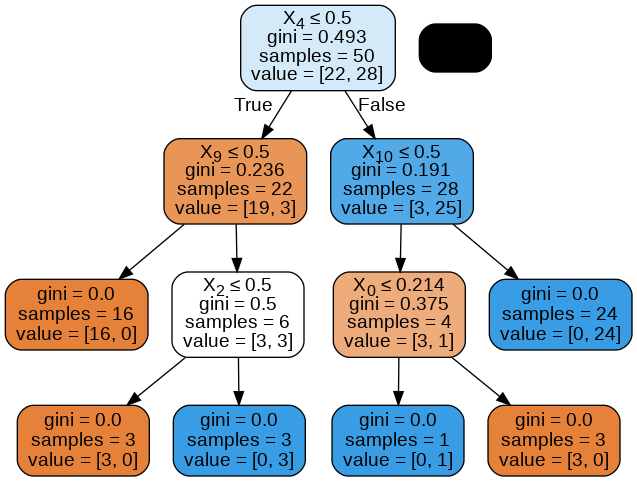

In [ ]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

In [ ]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

a = cv_scores.mean()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)

b = cv_scores.mean()

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

c = cv_scores.mean()

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
d = model.score(X_train,y_train)
print(model.score(X_test,y_test))
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


1.0


In [ ]:
X_test.head()

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_Turkey,contry_of_res_U.S. Outlying Islands,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
87,0.000000,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
291,0.000000,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,0.714286,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
267,0.142857,1,0,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
111,0.000000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
model.predict(X_test)


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0])

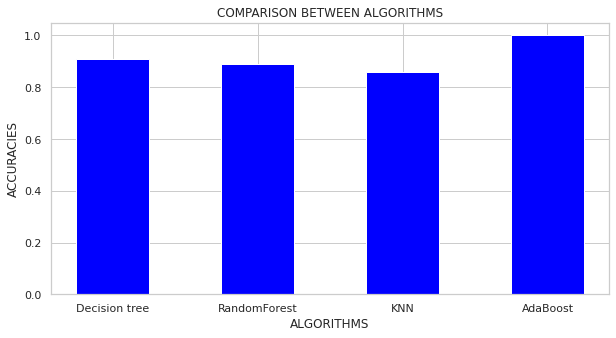

In [ ]:
comp = {'Decision tree':a,'RandomForest':b,'KNN':c,'AdaBoost':d}
alg = list(comp.keys())
accu = list(comp.values())
fig  = plt.figure(figsize = (10,5))
plt.bar(alg,accu,color = 'blue',width = 0.5)
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACIES")
plt.title("COMPARISON BETWEEN ALGORITHMS")
plt.show()